Import necessary libraries


In [ ]:
# Student1 Name : Ali Halayqa    ID : 1201769  Sec : 1
# Student2 Name : Mohammad Shreteh    ID : 1201369  Sec : 3

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


Loading the Dataset

In [ ]:
# Loading the dataset
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 32'], axis=1)
# Displaying the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Exploratory Data Analysis

The dataset has 569 rows and 32 columns.

Missing values by column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtyp

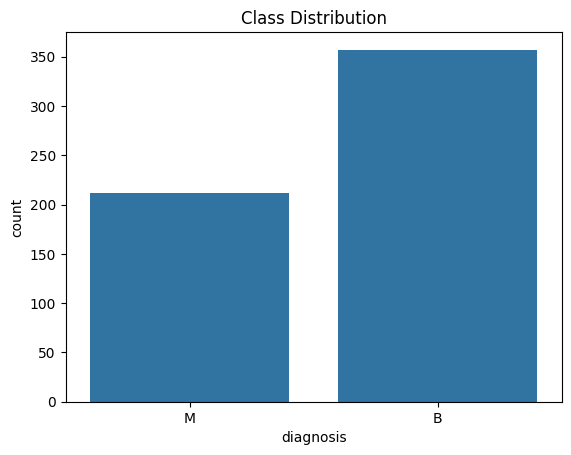

In [ ]:
# Display dataset dimensions
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Summarize missing values per column
print("\nMissing values by column:")
print(df.isnull().sum())

# Show statistical summary of the dataset
print("\nStatistical summary:")
print(df.describe())

# Visualize class distribution
sns.countplot(data=df, x='diagnosis')
plt.title('Class Distribution')
plt.show()



Data Cleaning and Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer


df.rename(columns={'diagnosis': 'Diagnosis'}, inplace=True)

# Encoding the target variable: M -> 1, B -> 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df.drop(columns=['id'], errors='ignore', inplace=True)

# Splitting features and target variable
X_split = df.drop(columns=['Diagnosis'])
y_split = df['Diagnosis']

# Displaying missing values for each column
print("\nMissing values per column:")
print(df.isnull().sum())

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_split)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_split, test_size=0.2, random_state=42, stratify=y_split
)

# Handling missing values with mean imputation
simpleinput = SimpleImputer(strategy='mean')
X_train = simpleinput.fit_transform(X_train)
X_test = simpleinput.transform(X_test)



Missing values per column:
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# 3. Part 1: K-Nearest Neighbors (KNN)**bold text**

*3.1*. Implementing KNN with Different Distance Metrics

In [ ]:
#store model
performanceKnn = {}
# Range of K values
rangeOf_K = range(1, 21)
# Defining distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']
optimalValueOf_K = {}


# Loop through each distance metric
for metric in distance_metrics:
    print(f"\nProcessing KNN with {metric} distance metric.")
    cv_scores = []
    for k in rangeOf_K:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    # Finding the optimal K
    optimal_k = rangeOf_K[np.argmax(cv_scores)]
    optimalValueOf_K[metric] = {
        'Optimal K': optimal_k,
        'Cross-Validated Accuracy': max(cv_scores)
    }
    print(f"Optimal K for {metric} distance: {optimal_k} with cross-validated accuracy of {max(cv_scores):.4f}")

    # Retraining KNN with optimal K
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    knn_optimal.fit(X_train, y_train)
    y_pred_optimal = knn_optimal.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred_optimal)
    precision = precision_score(y_test, y_pred_optimal)
    recall = recall_score(y_test, y_pred_optimal)
    f1 = f1_score(y_test, y_pred_optimal)
    roc = roc_auc_score(y_test, knn_optimal.predict_proba(X_test)[:, 1])

    # Storing performance results
    performanceKnn[metric] = {
        'Optimal K': optimal_k,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc
    }

# Displaying the optimal K for each distance metric
optimal_k_df = pd.DataFrame(optimalValueOf_K).T
print("\nOptimal K for each distance metric:")
print(optimal_k_df)

# Create a DataFrame to summarize KNN performance for each distance metric
knn_performance_df = pd.DataFrame.from_dict(performanceKnn, orient='index')
print("\nKNN Performance Summary for Each Distance Metric:")
print(knn_performance_df)


Processing KNN with euclidean distance metric.
Optimal K for euclidean distance: 3 with cross-validated accuracy of 0.9692

Processing KNN with manhattan distance metric.
Optimal K for manhattan distance: 5 with cross-validated accuracy of 0.9692

Processing KNN with cosine distance metric.
Optimal K for cosine distance: 11 with cross-validated accuracy of 0.9648

Optimal K for each distance metric:
           Optimal K  Cross-Validated Accuracy
euclidean        3.0                  0.969231
manhattan        5.0                  0.969231
cosine          11.0                  0.964835

KNN Performance Summary for Each Distance Metric:
           Optimal K  Accuracy  Precision    Recall  F1-Score   ROC-AUC
euclidean          3  0.938596   0.972973  0.857143  0.911392  0.982474
manhattan          5  0.956140   0.974359  0.904762  0.938272  0.983962
cosine            11  0.947368   0.950000  0.904762  0.926829  0.990410


Visualizing K vs Cross-Validated Accuracy for Each Distance Metric

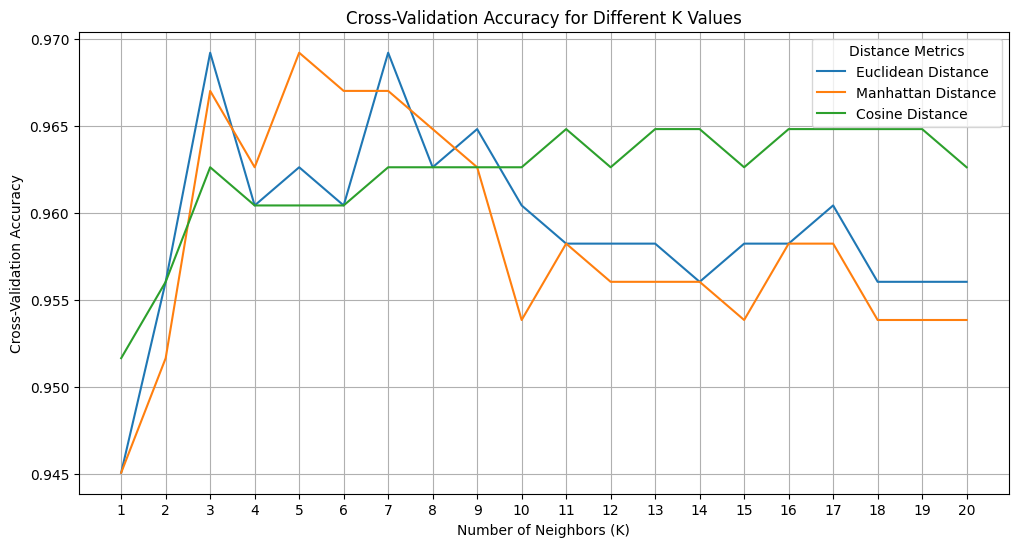

In [ ]:
# Plot cross-validation accuracy for each distance metric
plt.figure(figsize=(12, 6))

for metric in distance_metrics:
    cv_scores = []
    for k in rangeOf_K:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    plt.plot(rangeOf_K, cv_scores, label=f"{metric.capitalize()} Distance")


plt.title("Cross-Validation Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(rangeOf_K)
plt.legend(title="Distance Metrics")
plt.grid()
plt.show()


#4. Part 2: Logistic Regression

4.1 Training a Logistic Regression Model with Default Parameter

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting test set labels
logistic_predictions = logistic_model.predict(X_test)

# Evaluate model performance
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, logistic_predictions),
    "Precision": precision_score(y_test, logistic_predictions),
    "Recall": recall_score(y_test, logistic_predictions),
    "F1-Score": f1_score(y_test, logistic_predictions),
    "ROC-AUC": roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
}

# Display performance metrics
logistic_metrics_df = pd.DataFrame(logistic_metrics, index=["Logistic Regression"])
print("\nLogistic Regression Performance:")
print("----------------------------------------------------------------------")
print(logistic_metrics_df)



Logistic Regression Performance:
----------------------------------------------------------------------
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.973684    0.97561  0.952381  0.963855  0.996362


4.2. Experimenting with Regularization Techniques

In [ ]:
# Initializing and fitting GridSearchCV for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validated Accuracy: {best_score:.4f}")

dict_performance = {}
best_log_model = grid_search.best_estimator_

# Evaluate performance for each penalty (L1 and L2)
for penalty in ['l1', 'l2']:
    print(f"\nEvaluating Logistic Regression with {penalty} penalty:")

    gridSearch = GridSearchCV(
        LogisticRegression(random_state=42, solver='liblinear'),
        {'C': [0.01, 0.1, 1, 10, 100], 'penalty': [penalty]},
        cv=5, scoring='accuracy'
    )
    gridSearch.fit(X_train, y_train)

    best_model = gridSearch.best_estimator_
    y_pred = best_model.predict(X_test)

    metrics = {
        'Best C': gridSearch.best_params_['C'],
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    }

    dict_performance[penalty] = metrics

# Function to display performance for each penalty
def display_penalty_performance(penalty, metrics):
    print(f"Best C: {metrics['Best C']}")
    for metric, value in metrics.items():
        if metric != 'Best C':
            print(f"{metric}: {value:.4f}")


# Function to display summary performance
def display_summary_performance(dict_performance):
    print("\nSummary Performance for L1 and L2 Penalties:")
    performance_df = pd.DataFrame(dict_performance).T
    print(performance_df)


# Function to display best overall performance
def display_best_overall_performance(model, X_test, y_test):
    print("\nBest Overall Logistic Regression Performance:")
    y_pred_best = model.predict(X_test)
    best_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_best),
        'Precision': precision_score(y_test, y_pred_best),
        'Recall': recall_score(y_test, y_pred_best),
        'F1-Score': f1_score(y_test, y_pred_best),
        'ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }
    for metric, value in best_metrics.items():
        print(f"{metric}: {value:.4f}")


# Display performance for each penalty
for penalty, metrics in dict_performance.items():
    print(f"\nPerformance for {penalty} Penalty:")
    display_penalty_performance(penalty, metrics)

# Display summary of performance
display_summary_performance(dict_performance)

# Display best overall performance
display_best_overall_performance(best_log_model, X_test, y_test)


y_pred_best = best_log_model.predict(X_test)
best_log_acc = accuracy_score(y_test, y_pred_best)
best_log_prec = precision_score(y_test, y_pred_best)
best_log_rec = recall_score(y_test, y_pred_best)
best_log_f1 = f1_score(y_test, y_pred_best)
best_log_roc = roc_auc_score(y_test, best_log_model.predict_proba(X_test)[:, 1])


Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9758

Evaluating Logistic Regression with l1 penalty:

Evaluating Logistic Regression with l2 penalty:

Performance for l1 Penalty:
Best C: 1
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639
ROC-AUC: 0.9964

Performance for l2 Penalty:
Best C: 0.1
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756
ROC-AUC: 0.9980

Summary Performance for L1 and L2 Penalties:
    Best C  Accuracy  Precision    Recall  F1-Score   ROC-AUC
l1     1.0  0.973684    0.97561  0.952381  0.963855  0.996362
l2     0.1  0.982456    1.00000  0.952381  0.975610  0.998016

Best Overall Logistic Regression Performance:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756
ROC-AUC: 0.9980


4.3. Comparing Logistic Regression with KNN

In [ ]:
# Creating a comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
})

# Adding KNN performance (selecting the best distance metric based on ROC-AUC)
best_knn_metric = knn_performance_df['ROC-AUC'].idxmax()
comparison['KNN'] = [
    knn_performance_df.loc[best_knn_metric, 'Accuracy'],
    knn_performance_df.loc[best_knn_metric, 'Precision'],
    knn_performance_df.loc[best_knn_metric, 'Recall'],
    knn_performance_df.loc[best_knn_metric, 'F1-Score'],
    knn_performance_df.loc[best_knn_metric, 'ROC-AUC']
]

# Adding Logistic Regression performance
comparison['Logistic Regression'] = [
    best_log_acc,
    best_log_prec,
    best_log_rec,
    best_log_f1,
    best_log_roc
]

print("\nComparison between KNN and Logistic Regression:")
print(comparison)



Comparison between KNN and Logistic Regression:
      Metric       KNN  Logistic Regression
0   Accuracy  0.947368             0.982456
1  Precision  0.950000             1.000000
2     Recall  0.904762             0.952381
3   F1-Score  0.926829             0.975610
4    ROC-AUC  0.990410             0.998016


#5. Part 3: Support Vector Machines (SVM)

5.1. Implementing SVM with Different Kernels

In [ ]:

# Defining kernels to experiment with
kernels = ['linear', 'poly', 'rbf']

# Dictionary to store models and their performances
svm_performance = {}

for kernel in kernels:
    print(f"\nProcessing SVM with {kernel} kernel.")
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)

    # Calculating evaluation metrics
    acc = accuracy_score(y_test, y_pred_svm)
    prec = precision_score(y_test, y_pred_svm)
    rec = recall_score(y_test, y_pred_svm)
    f1 = f1_score(y_test, y_pred_svm)
    roc = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

    svm_performance[kernel] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1, 'ROC-AUC': roc}

# Displaying the performance
svm_df = pd.DataFrame(svm_performance).T
print("\nSVM Performance with Different Kernels:")
print(svm_df)



Processing SVM with linear kernel.

Processing SVM with poly kernel.

Processing SVM with rbf kernel.

SVM Performance with Different Kernels:
        Accuracy  Precision    Recall  F1-Score   ROC-AUC
linear  0.964912        1.0  0.904762  0.950000  0.991402
poly    0.885965        1.0  0.690476  0.816901  0.996693
rbf     0.973684        1.0  0.928571  0.962963  0.995370


5.2. Hyperparameter Tuning for SVM

In [ ]:

# Defining parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid Search for RBF kernel
print("\nPerforming Grid Search for SVM with RBF Kernel...")
grid_rbf = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid_rbf, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)

print(f"Best Parameters for RBF Kernel: {grid_rbf.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_rbf.best_score_:.4f}")

# Best estimator
best_svm_rbf = grid_rbf.best_estimator_
y_pred_rbf = best_svm_rbf.predict(X_test)

# Evaluation
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
rbf_precision = precision_score(y_test, y_pred_rbf)
rbf_recall = recall_score(y_test, y_pred_rbf)
rbf_f1 = f1_score(y_test, y_pred_rbf)
rbf_roc = roc_auc_score(y_test, best_svm_rbf.predict_proba(X_test)[:,1])

print("\nSVM with RBF Kernel (Best Parameters) Performance:")
print(f"Accuracy: {rbf_accuracy:.4f}")
print(f"Precision: {rbf_precision:.4f}")
print(f"Recall: {rbf_recall:.4f}")
print(f"F1-Score: {rbf_f1:.4f}")
print(f"ROC-AUC: {rbf_roc:.4f}")

# Updating SVM performance with best RBF kernel
svm_performance['rbf_best'] = {
    'Accuracy': rbf_accuracy,
    'Precision': rbf_precision,
    'Recall': rbf_recall,
    'F1-Score': rbf_f1,
    'ROC-AUC': rbf_roc
}



Performing Grid Search for SVM with RBF Kernel...
Best Parameters for RBF Kernel: {'C': 100, 'gamma': 0.01}
Best Cross-Validated Accuracy: 0.9758

SVM with RBF Kernel (Best Parameters) Performance:
Accuracy: 0.9561
Precision: 0.9512
Recall: 0.9286
F1-Score: 0.9398
ROC-AUC: 0.9931


Comparing Different SVM Kernels Including Tuned RBF

In [ ]:

# Creating an updated SVM performance DataFrame
svm_comparison = pd.DataFrame(svm_performance).T
print("\nUpdated SVM Performance including Tuned RBF Kernel:")
print(svm_comparison)



Updated SVM Performance including Tuned RBF Kernel:
          Accuracy  Precision    Recall  F1-Score   ROC-AUC
linear    0.964912    1.00000  0.904762  0.950000  0.991402
poly      0.885965    1.00000  0.690476  0.816901  0.996693
rbf       0.973684    1.00000  0.928571  0.962963  0.995370
rbf_best  0.956140    0.95122  0.928571  0.939759  0.993056


#6. Part 4: Ensemble Methods

6.1. Boosting with AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)

# Evaluate performance
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_f1 = f1_score(y_test, y_pred_ada)
ada_roc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

# Print results with improved formatting
print("\nAdaBoost Performance Evaluation:")
print("-" * 50)
print(f"{'Metric':<20} {'Score':<10}")
print("-" * 50)
print(f"{'Accuracy':<20} {ada_accuracy:.4f}")
print(f"{'Precision':<20} {ada_precision:.4f}")
print(f"{'Recall':<20} {ada_recall:.4f}")
print(f"{'F1-Score':<20} {ada_f1:.4f}")
print(f"{'ROC-AUC':<20} {ada_roc:.4f}")
print("-" * 50)



AdaBoost Performance Evaluation:
--------------------------------------------------
Metric               Score     
--------------------------------------------------
Accuracy             0.9737
Precision            1.0000
Recall               0.9286
F1-Score             0.9630
ROC-AUC              0.9854
--------------------------------------------------


6.2. Bagging with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Print results with improved formatting
print("\nRandom Forest Performance Evaluation:")
print("-" * 50)
print(f"{'Metric':<20} {'Score':<10}")
print("-" * 50)
print(f"{'Accuracy':<20} {rf_accuracy:.4f}")
print(f"{'Precision':<20} {rf_precision:.4f}")
print(f"{'Recall':<20} {rf_recall:.4f}")
print(f"{'F1-Score':<20} {rf_f1:.4f}")
print(f"{'ROC-AUC':<20} {rf_roc:.4f}")
print("-" * 50)



Random Forest Performance Evaluation:
--------------------------------------------------
Metric               Score     
--------------------------------------------------
Accuracy             0.9737
Precision            1.0000
Recall               0.9286
F1-Score             0.9630
ROC-AUC              0.9929
--------------------------------------------------


6.3. Comparing Boosting and Bagging

In [ ]:
import pandas as pd

# Creating a comparison DataFrame
ensemble_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'AdaBoost': [ada_accuracy, ada_precision, ada_recall, ada_f1, ada_roc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc]
})

# Print the comparison in a clean format
print("\nComparison between AdaBoost and Random Forest:")
print("-" * 50)
print(ensemble_comparison.to_string(index=False))
print("-" * 50)



Comparison between AdaBoost and Random Forest:
--------------------------------------------------
   Metric  AdaBoost  Random Forest
 Accuracy  0.973684       0.973684
Precision  1.000000       1.000000
   Recall  0.928571       0.928571
 F1-Score  0.962963       0.962963
  ROC-AUC  0.985450       0.992890
--------------------------------------------------


6.4. Comparison with Individual Models

In [ ]:
import pandas as pd

# Creating a comparison DataFrame with metrics for all models
comparison_extended = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'SVM (RBF Best)': [rbf_accuracy, rbf_precision, rbf_recall, rbf_f1, rbf_roc],
    'AdaBoost': [ada_accuracy, ada_precision, ada_recall, ada_f1, ada_roc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc]
})

# Setting 'Metric' as the index for cleaner display
comparison_extended.set_index('Metric', inplace=True)

# Displaying the extended comparison with spaces for better readability
print("\n" + "=" * 50)
print("Extended Model Comparison".center(50))
print("=" * 50)
print("\n")
print(comparison_extended)
print("\n" + "=" * 50)



            Extended Model Comparison             


           SVM (RBF Best)  AdaBoost  Random Forest
Metric                                            
Accuracy         0.956140  0.973684       0.973684
Precision        0.951220  1.000000       1.000000
Recall           0.928571  0.928571       0.928571
F1-Score         0.939759  0.962963       0.962963
ROC-AUC          0.993056  0.985450       0.992890



#7.Visualization of Model Comparisons


Comparing All Models Based on ROC-AUC

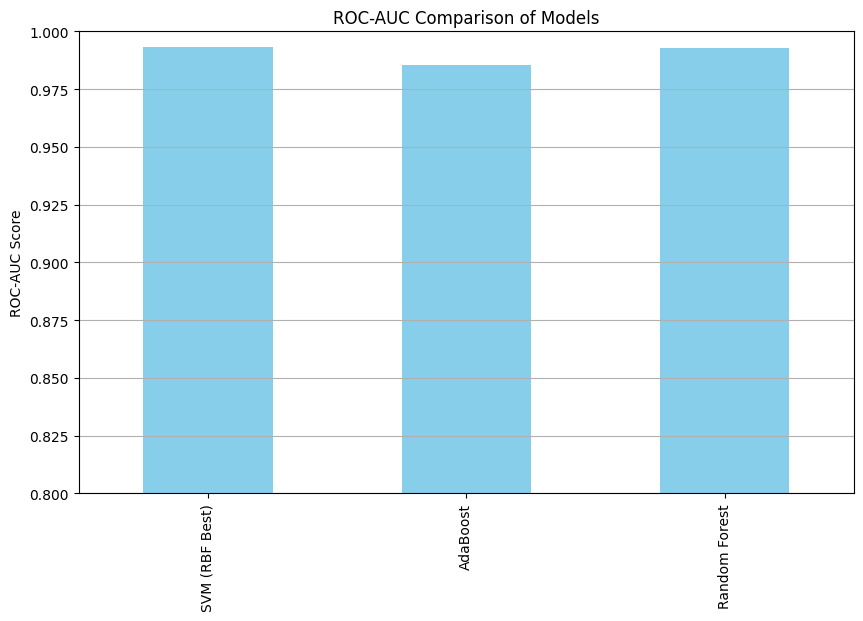

In [ ]:
plt.figure(figsize=(10,6))
comparison_extended.loc['ROC-AUC'].plot(kind='bar', color='skyblue')
plt.title('ROC-AUC Comparison of Models')
plt.ylabel('ROC-AUC Score')
plt.ylim(0.8,1)
plt.grid(axis='y')
plt.show()

Comparing All Models Based on Accuracy

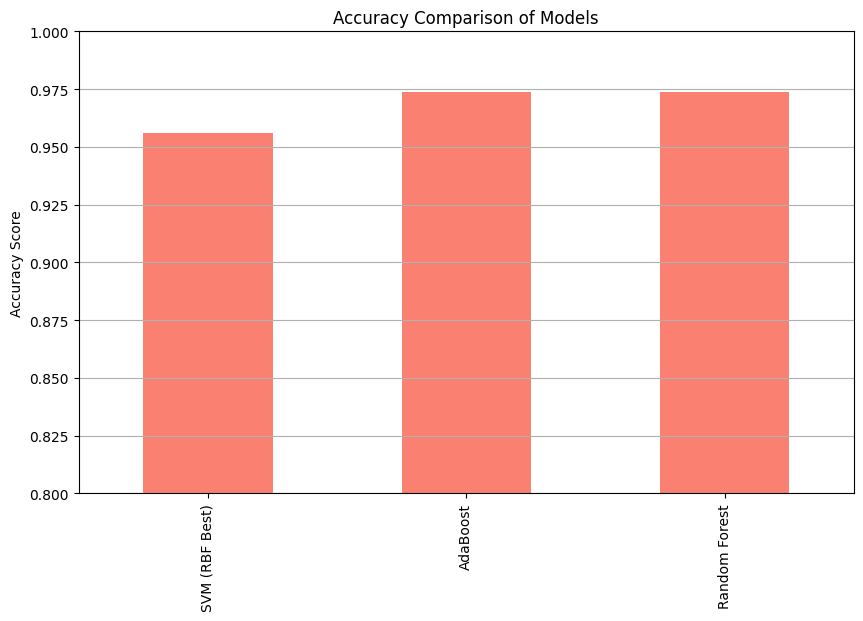

In [ ]:
plt.figure(figsize=(10,6))
comparison_extended.loc['Accuracy'].plot(kind='bar', color='salmon')
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy Score')
plt.ylim(0.8,1)
plt.grid(axis='y')
plt.show()